# Data Visualization Lab

## Objectives

* Run a visual analytic experiment on Wine quality dataset.
* Understand the wider applications of the techniques covered during earlier lessons/labs.
* Apply  bar charts, pie charts, histograms, scatter plots, violin plots, vox plots, heat map and parallel plots to identify factors that may affect the quality of red wine. 


## Introduction

In this lab, we shall put the skills learnt around statistical visualizations in previous two lessons into practice. We shall work with a real-world open dataset called **"The Wine Dataset"**, available at [UCI's machine learning repository](https://archive.ics.uci.edu/ml/datasets/wine). The original dataset is results of a chemical analysis of wines grown in Italy but derived from three different plants. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

We shall use a subset of data focusing at Red Wine contituents and quality only for this lab. A detailed description of included features can be viewed at [Kaggle](https://www.kaggle.com/piyushgoyal443/red-wine-dataset/home).

Let's first import the necessary libraries we would need for loading the data and visualizations.

In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('ggplot')

The dataset is available in your folder as `winequality-red.csv`. Let's first load this dataset into a pandas dataframe and view the head.

In [3]:
# Read dataset
# Display first 5 observations

# fixed acidity	volatile acidity	citric acid	residual sugar	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol	quality
# 0	7.4	0.70	0.00	1.9	0.076	11.0	34.0	0.9978	3.51	0.56	9.4	5
# 1	7.8	0.88	0.00	2.6	0.098	25.0	67.0	0.9968	3.20	0.68	9.8	5
# 2	7.8	0.76	0.04	2.3	0.092	15.0	54.0	0.9970	3.26	0.65	9.8	5
# 3	11.2	0.28	0.56	1.9	0.075	17.0	60.0	0.9980	3.16	0.58	9.8	6
# 4	7.4	0.70	0.00	1.9	0.076	11.0	34.0	0.9978	3.51	0.56	9.4	

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Okie, this gives us an idea about features in the dataset. Except for the wine quality, which is a categorical variables, all other features are real valued. 

### Bar Graph

As a first step, let's plot a bar graph to show frequency of each class in the `quality` variable (this is known as "response" variable). For this, we need to count the number occurrences of each class in the quality variable and plot the class-frequency bar chart.

In [3]:
# In the quality variable, count the number of occurances for each class. 
# Use pandas value_counts()
# Create two lists: a) class labels , b) class frequency


    

[5, 6, 7, 4, 8, 3] [681 638 199  53  18  10]


Now we can use the two lists above for x and y axes of the bar graph where classes(keys above) appear on x-axis and frequency (count) of classes appear on y-axis.

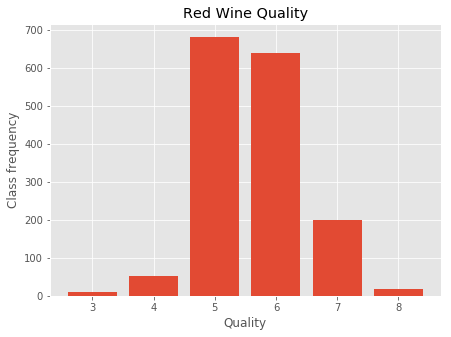

In [4]:
# Create a new figure object

# Create an axes 

# Plot vertical bars of fixed width by passing x and y values to .bar() function 

# Give a title to the bar graph

# Output the final plot

So we can see that most of the observations in the dataset are for quality class 5 and 6 , i.e. average quality. We can not see any observations with quality class 1 or 2 (worst), and 9 (best) quality. 

Let's reduce the number of classes from 10 (1,2,--,10) to 3 (Good, Average and Poor) as that might give us a better indication of the contents of this dataset. For this, we shall create a new discrete (categorical) response feature ('rating') from existing 'quality' variable using following criteria:

* poor: 1-4
* average: 5-6
* good: 7-10

There are number of ways we can achieve this. Let's try following steps:

1. From wine dataset, create a list `condition` containing boolean values i.e. `True` for good and poor quality wine. (We'll deal with average in the next step)
2. Add a new variable `rating` to the dataset by identifying good and poor quality wines using `condition` from step 1. Set 'average' as default while using `np.select()` to achieve this. 
3. Count the values for each class in the new column. 

In [4]:
condition = [(wine['quality'] >= 7),(wine['quality'] <= 4)]
rating = ['good', 'poor']
wine['rating'] = np.select(condition, rating, default='average')
wine.rating.value_counts()

average    1319
good        217
poor         63
Name: rating, dtype: int64

Using the new rating variable, we can now go ahead and draw a similar bar plot as above.

We shall use `pandas.value_counts()` again to calculate the frequency of each new class and draw a bar plot exactly as above. 

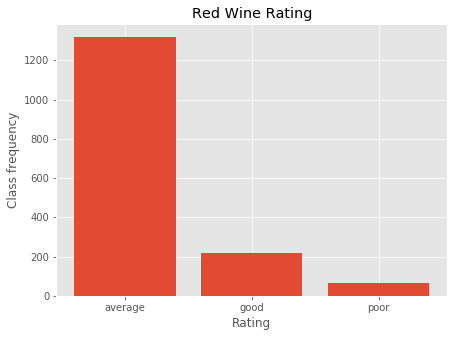

In [6]:
#Count frequency of new classes

# Create a new figure object

# Set a bar graph at new axes

# Provide axes labels and title

# Output the final plot


This bar graph summarizes the data in a convenient way and we can see that most examples in our dataset are of average quality/rating. 

### Pie Chart

How about plotting a pie chart for an alternative view with an indication of percentage of each class? We can also explode the slice with highest frequency. You other formatting skills earned in previous labs to prettify the pie chart. 

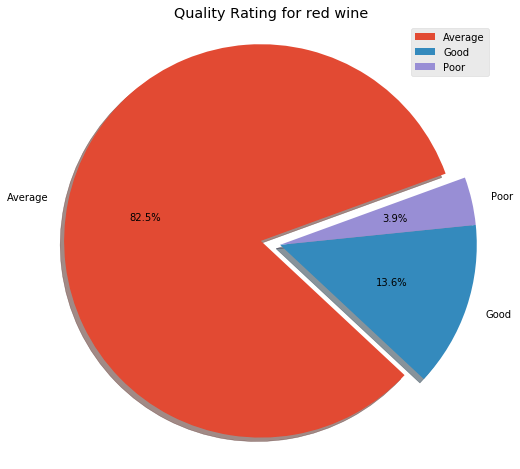

In [7]:
#Create labels for slices and set explode value

# Create a new figure space with a single axes

# Create the pie chart with above data and customize by passing extra arguments

# Set legends , axis and title

SO 82% of samples we have in our dataset belong to the average quality class. 

### Statistical Visualizations

#### Boxplots

We can dig a bit deeper to get more insights about WHAT impacts the quality of red wine in terms of its constituents. Let's use box plots to view the spread of classes in the `rating` column against `sulphates` first. 

*sulphates are wine additives which can contribute to sulfur dioxide gas (S02) levels and act as an antimicrobial and antioxidant*

For this you need to set the `rating` classes at x-axis and amount of `sulphates` on y-axis. 

>Hint : You can set labels and title for seaborn plots using `seaborn.set(xlabel, ylabel, title)` after plotting the visualization. 

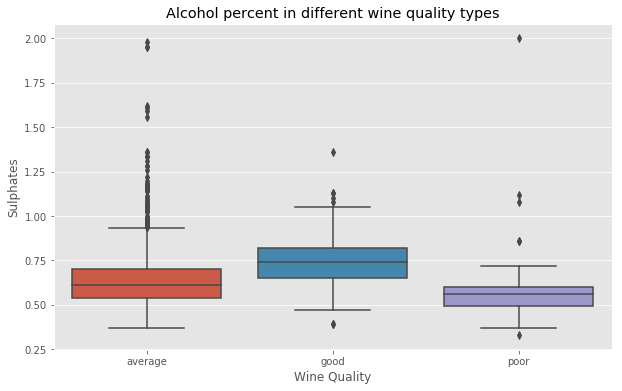

In [8]:
# Create a new figure and axes 

# Create a box plot for wine classes against sulphates


The above gives us SOME indication that amount of sulphates in red wine has to be within a certain range (around 0.5 to 1, with a median value 0.75) to qualify it as a good wine. Poor and average classes have lower median values of sulphates with many extreme outliers. 

#### Violin Plot

Let's try to observe the impact of `citric acid` on the quality of wine now. 

*citric acid is found in small quantities and can add 'freshness' and flavor to wines*

This time, we shall use a violin plot from seaborn to visualize the data. A violin plot will help us visualize the spread of data with box plots and also a density function to inspect the mean values. We shall draw this exactly as above using seaborn's `violinplot()` function.

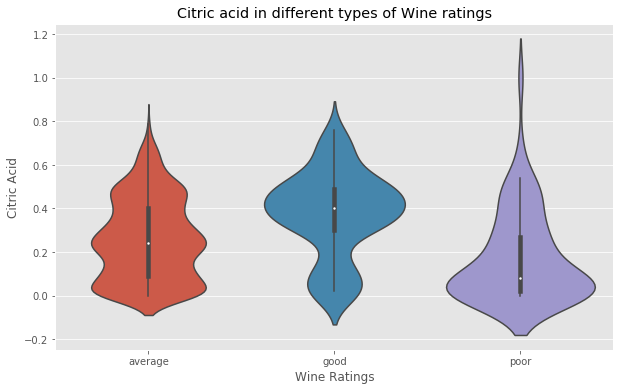

In [9]:
# Create a new figure and axes 

# Create a label a violin plot to monitor the impact of citric acid on different classes of rating. 


This visualization tells us following: 
* For good quality wine, the median value of citric acis is around 0.4 and Kernel tells us that most examples of good wine has a probability density around this median value (i.e. mean and median values aren't much different which is a good indicator for a solid conclusion). 

* Average quality wine has slightly lower median value (around 0.25) and density that  appears uniform throughout the range (0 - 0.5). 

* Poor quality wine has even lower median value of citric acid (around 0.1) and most of the examples lie in this region as shown by KDE. 

So based on this, we can conclude that citric acid plays an important role towards the quality of red wine and ideal value for this is around 0.4. This also tells us that violin plots could be more beneficial towards visual inspection of the spread and centrality of data variables. 

On the same lines, we can check other features against the quality of wine and comparing box plots, violin plots or even swarm plots to study the impact and ranges of ingredients. 

#### Histograms

Let's move on now and create a histogram for the `alcohol` variable and see the distribution of alcohol amount within the wine dataset. 

*Note: The `alcohol` variable in the dataset carries a percentage value* 

We shall use seaborn's `distplot()` function. Set number of bins to 10,  also label and set titles as before. Let's also show the KDE and try to analyse the output visually. 

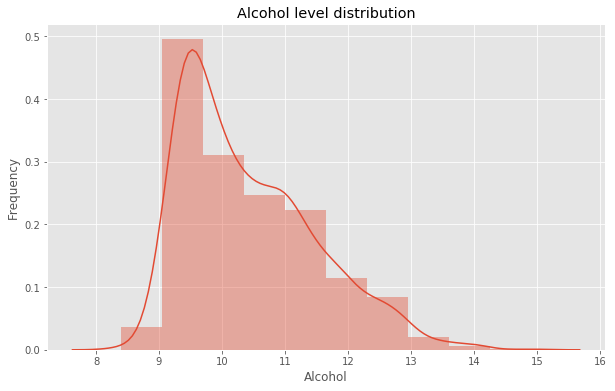

In [10]:
# Create a histogram for alcohol feature

This shows us that most of the values in the `alcohol` variable are centered around 9 (i.e. 9% alcohol). But how does this impact the quality ? Do this value play some role red wine being identified as good quality ? 

Let's visualize `alcohol` percentage against the `rating` variable to get some insight. We can use a swarm plot, box plot or violin plot for this. How about we try all three and see which one is more revealing. 

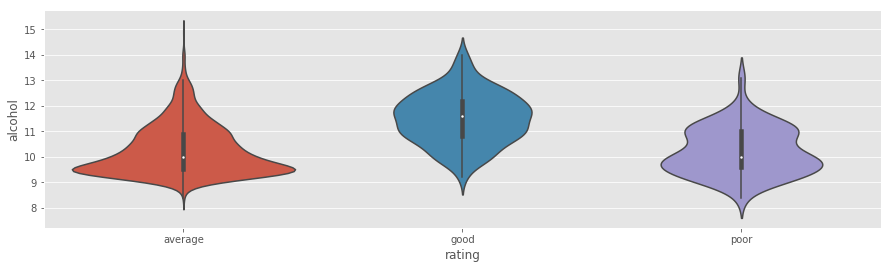

Trying all three approaches mentioned above, we can see that a violin plot is indeed more revealing as it gives a clear indication of spread (variance) and center (mean) of the data. From the above plot, it becomes quite clear that people prefer red wine with a higher concentration of alcohol with mean and median values at around 11.5 %. 

NOTE: Always remember, you must never consider findings this as a conclusive cause-effect relationship between wine and amount of alcohol. We can see that some wine samples have up to 12 % of alcohol and still get categorized as poor or average. So this could be a contributing factor among others, but not exactly a "cause'. 

#### Scatter Plot

Let's visualize it again using a scatter plot with color coding of samples based on the rating value. We shall use seaborn's `.lmplot()` for this. 

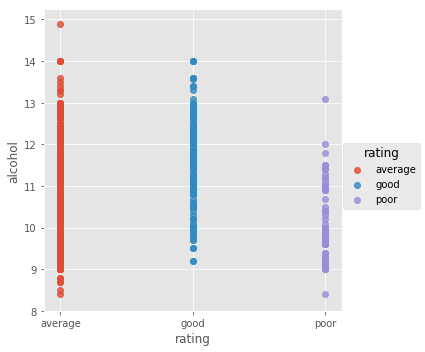

Looking at the spread of values across classes, this confirms our observation from previous visualization. Try plotting above with the `quality` variable originally present in the dataset and see if it provides any further insight. 

#### Dataset-wide Histograms

`Matplotlib` offers a handy way to view the histogram of all the numerical  variables found in the dataset. For this, we can simply apply `.hist()` to a pandas dataframe. Let's apply this to the `wine` dataframe and observe the output. Set a figure size = 15x15 for a larger display. 

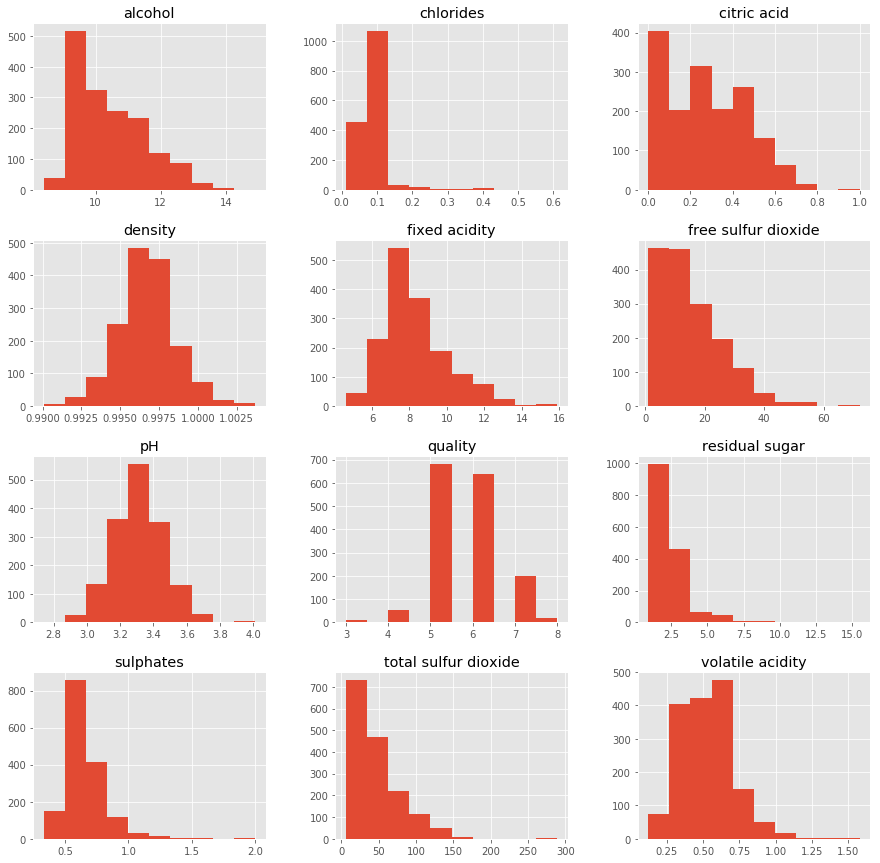

In [13]:
# Plot a histogram of all numerical variables in the dataset

In above we can individually study and compare the quantities for each ingredient in the dataset just as we did with alcohol above. With some interesting observations, we can drill deeper and compare two or more variables in detail. 

###  Heat Map and Feature Correlations 

Let's now plot a heatmap using seaborn's `.heatmap()` function to find the correlation (similarity) between different ingredients of red wine. For this we shall:
* Creata new dataset with only numercial variables from wine data.
* Calculate the correlation matrix from the new dataset. Change values to include 2 decimal places
* define a new figure and axes with suitable size
* Plot the heat map from correlation matrix - set vmax=1 and annot=True for viewing the correlations on each cell of the heat map

In [14]:
# Create a copy of original dataset and drop the rating variable

# Create and print a correlation plot (round off to 2 decimal places) 

# corr


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


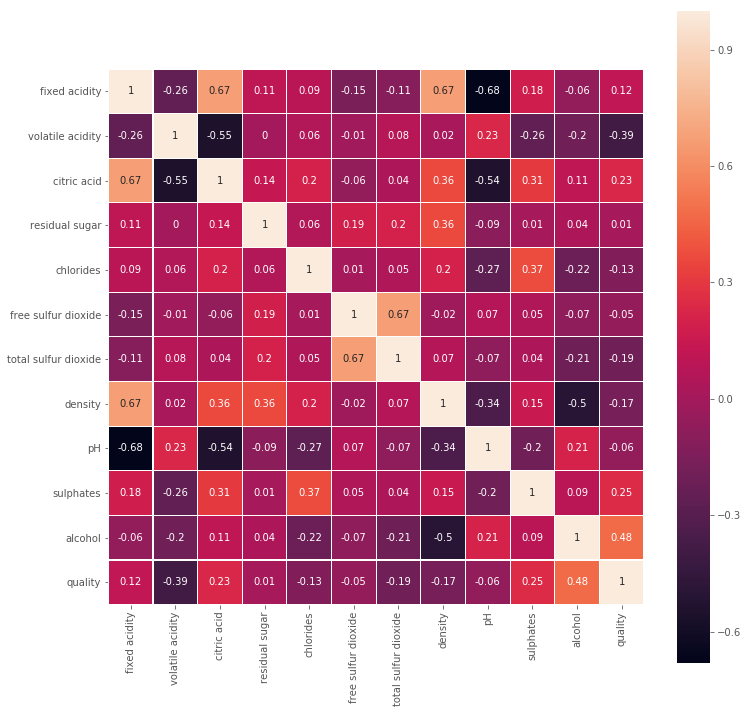

Looking at this heat map, we can observe that the `alcohol`, `sulphates`, `citric_acid` & `fixed_acidity` have higher correlation with response variable `quality` as compared to other variables. 
But looking between variables, we can also see that `sulphates` have a high correlation with `chlorides` and `fixed_acidity` is correlated with `density`. So apparently these variables are indirectly playing some role in determining the quality of wine. Again, looking at these in more detail might help us uncover more insights about the data. 

#### Color-coded Bar Chart

The correlation of `quality` with other variables can also be viewed as bar chart.  

Let's sort the values of `quality` variable (now containing correlation values) in the `corr` dataframe in a descending order, with respect to other variables. We must also drop the correlation of `quality` with itself as that would always be =1.

In [16]:
# Create a copy of corr.quality, drop the correlation of quality with itself and ..
# sort values in a descending order


# alcohol                 0.48
# sulphates               0.25
# citric acid             0.23
# fixed acidity           0.12
# residual sugar          0.01
# free sulfur dioxide    -0.05
# pH                     -0.06
# chlorides              -0.13
# density                -0.17
# total sulfur dioxide   -0.19
# volatile acidity       -0.39
# Name: quality, dtype: float64

alcohol                 0.48
sulphates               0.25
citric acid             0.23
fixed acidity           0.12
residual sugar          0.01
free sulfur dioxide    -0.05
pH                     -0.06
chlorides              -0.13
density                -0.17
total sulfur dioxide   -0.19
volatile acidity       -0.39
Name: quality, dtype: float64

We can now show a bar graph of `quality_corr` while color coding positive correlations with green and negative with a red color.

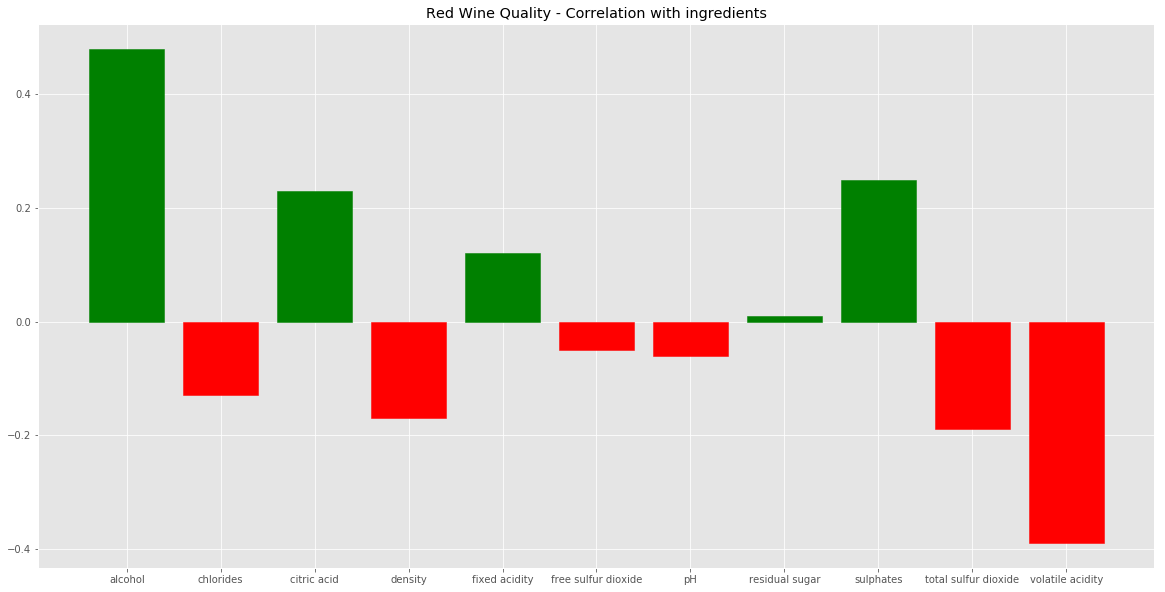

In [17]:
# Create a new figure object and axes

# Plot vertical bars of fixed width by passing x and y values to .bar() function 

# Apply different colors to bars on +ve and -ve y values

# Give a title to the bar graph

# Output the final plot


Looking at this bar graph, our previous observation still holds strong. Similar bar graphs can be plotted for inspecting correlation of one variable with other in isolation. 

#### Parallel Co-ordinate Plot

Another visualization tool we can use to inspect the relationship of variables is to code a parallel coordinate plot. We need to perform following steps:
* Create a new dataset with only `alcohol`, `citric acid`, `fixed acidity` variables. 
* Normalize the new dataset and append the rating column from original dataset
* Use matplotlib's `parallel_coordinate()` function to draw the normalized variables with respect to classes in `rating`.

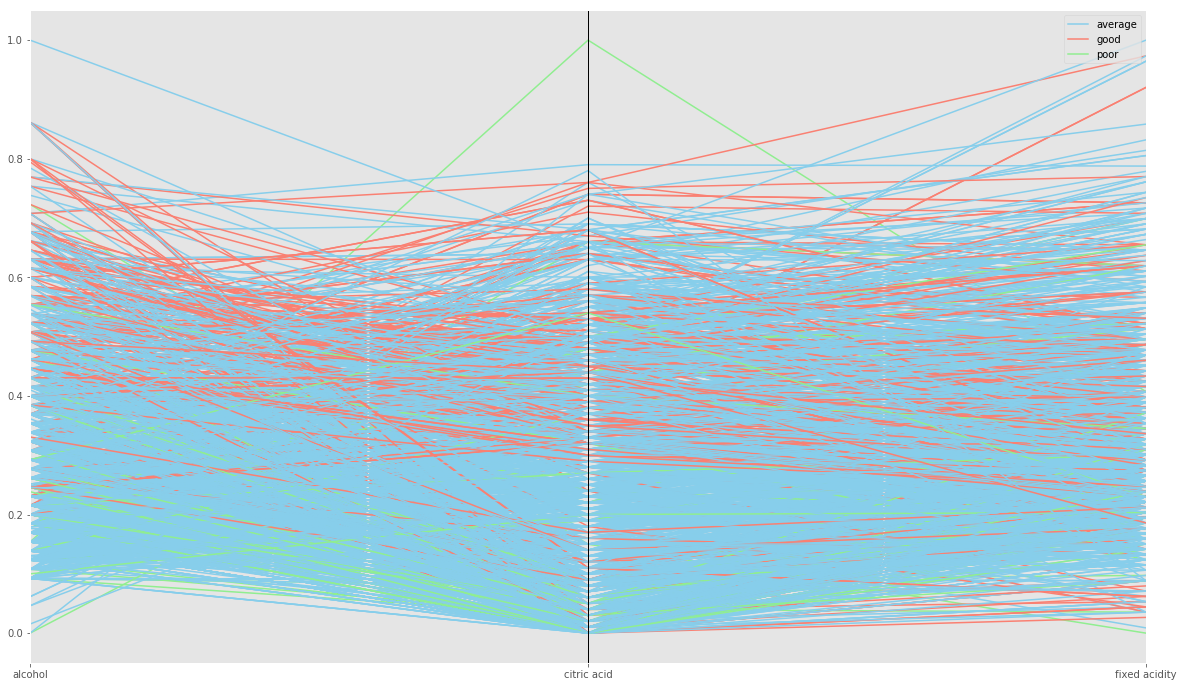

So looking at above, it is very hard to see any relationships due to occlusion i.e. visual objects hiding other visual objects. You can try setting `%matplotlib qt` magic in above cell and view it in an external window and be able to zoom in and out. You can also try inspecting good, average and poor quality samples individually for much clearer and deeper insight.

## Summary 

In this visualization lab, we performed a visual analytics experiment with a focus on identify factors that can affect the quality of red wine. We used a number of plotting techniques including bar charts, pie charts, histograms, scatter plots, violin plots, vox plots, heat map and parallel plots. We identified some relationship between a few ingredients and quality of red wine through our visual inspection of the plots. This activity provides a framework for analyzing further datasets in future. 